In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Exploratory analysis of data

In [2]:
data = pd.read_xml("./updated_database/posts.xml")

In [3]:
data.shape

(308300, 22)

In [4]:
df_sorted = data.sort_values('CreationDate')

In [5]:
df_sorted.head(2)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,FavoriteCount,ContentLicense,ParentId,LastEditorDisplayName,OwnerDisplayName,CommunityOwnedDate,ClosedDate
0,1,1,2.0,2015-10-29T15:56:52.933,33,520.0,<p>Estoy creando un servicio usando <em>ASP.NE...,23.0,13558.0,2019-07-07T21:36:17.737,...,<.net><asp.net-web-api><asp.net>,1.0,2,4.0,CC BY-SA 4.0,NaN,None,None,None,None
1,2,2,NaN,2015-10-29T19:14:23.673,26,NaN,<p>He encontrado la solución.</p>\n\n<p>Result...,23.0,NaN,None,...,None,NaN,2,NaN,CC BY-SA 3.0,1.0,None,None,None,None


In [6]:
df_sorted.tail(2)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,FavoriteCount,ContentLicense,ParentId,LastEditorDisplayName,OwnerDisplayName,CommunityOwnedDate,ClosedDate
308298,431641,1,NaN,2021-02-28T02:33:33.357,0,2.0,<p>Estoy tratando de crear un script en powers...,144334.0,NaN,None,...,<script><email><powershell><codificación><outl...,0.0,0,NaN,CC BY-SA 4.0,NaN,None,None,None,None
308299,431642,1,NaN,2021-02-28T02:50:40.080,0,3.0,<p>Estoy realizando un tabla maestro detalle ...,207109.0,NaN,None,...,<sql-server><stored-procedure>,0.0,0,NaN,CC BY-SA 4.0,NaN,None,None,None,None


In [7]:
questions = data[data['PostTypeId']==1]

In [8]:
len(questions)

145623

In [9]:
data['PostTypeId'].value_counts()

2    159308
1    145623
5      1672
4      1672
6        23
7         2
Name: PostTypeId, dtype: int64

In [ ]:
df_votes = pd.read_xml("./updated_database/votes.xml")

In [ ]:
df_votes.head(1)

In [ ]:
df_votes.shape

In [ ]:
df_votes['VoteTypeId'].value_counts()

In [ ]:
accepted = df_votes[df_votes['VoteTypeId']==2]

In [ ]:
accepted.head(2)

# Analysis of user's reputation over the years

In [9]:
df_users = pd.read_xml("./updated_database/users.xml")

In [10]:
len(df_users)

197836

In [11]:
df_users.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
0,-1,1,2015-10-26T21:36:24.767,Comunidad,2015-10-26T21:36:24.767,NaN,en la granja de servidores,"<p>Hola, no soy una persona real.</p>\n\n<p>¡S...",251,9652,17781,-1.0,None


In [12]:
df_users['Reputation'].max()

91715

In [45]:
highest_reputation_index = df_users['Reputation'].idxmax()
highest_reputation_person = df_users.loc[highest_reputation_index]
print(highest_reputation_person)

Id                                                                95
Reputation                                                     91715
CreationDate                                 2015-12-01T16:53:09.890
DisplayName                                                 Jorgesys
LastAccessDate                               2021-02-27T23:14:52.843
WebsiteUrl                                 http://www.cplusplus.com/
Location                   Mexico City, CDMX, Mexico / Iași, Romania
AboutMe            <p><a href="/questions/tagged/java" class="pos...
Views                                                          13489
UpVotes                                                         8162
DownVotes                                                       2276
AccountId                                                    91056.0
ProfileImageUrl                                                 None
Year                                                            2015
Name: 86, dtype: object


In [13]:
df_users['Reputation'].min()

1

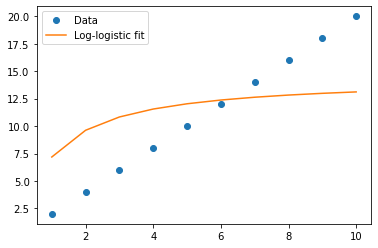

In [8]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Define the log-logistic function
def log_logistic(x, a, b):
    return (a * x ** b) / (1 + x ** b)

# Fit the curve to the data using the curve_fit function
params, cov = curve_fit(log_logistic, x, y)

# Generate a new set of x-values to plot the curve
x_fit = np.linspace(1, 10, 10)

# Calculate the y-values for the curve using the fitted parameters
y_fit = log_logistic(x_fit, params[0], params[1])

# print("x length is",len(x))
# print("x length is",len(y))
# print("x length is",len(y_fit))
# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y, 'y_fit': y_fit})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data')
plt.plot(df['x'], df['y_fit'], '-', label='Log-logistic fit')
plt.legend()
plt.show()

In [76]:
df_users['Year'] = pd.to_datetime(df_users['CreationDate']).dt.year
df_users['Month'] = pd.to_datetime(df_users['CreationDate']).dt.month

In [77]:
df_users.head(2)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,Year,Month
0,-1,1,2015-10-26T21:36:24.767,Comunidad,2015-10-26T21:36:24.767,NaN,en la granja de servidores,"<p>Hola, no soy una persona real.</p>\n\n<p>¡S...",251,9652,17781,-1.0,None,2015,10
1,1,101,2015-10-26T22:50:12.710,Geoff Dalgas,2021-01-05T19:45:26.807,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,2883,0,0,2.0,https://i.stack.imgur.com/nDllk.png?s=128&g=1,2015,10


In [21]:
yearly_reputation = df_users.groupby('Year')['Reputation'].sum()

In [22]:
yearly_reputation

Year
2015     709408
2016    1659920
2017    1197281
2018     804617
2019     542802
2020     378907
2021      29855
Name: Reputation, dtype: int64

In [80]:
df_users_2015 = df_users[df_users['Year']==2015]
df_users_2016 = df_users[df_users['Year']==2016]
df_users_2017 = df_users[df_users['Year']==2017]
df_users_2018 = df_users[df_users['Year']==2018]
df_users_2019 = df_users[df_users['Year']==2019]
df_users_2020 = df_users[df_users['Year']==2020]
df_users_2021 = df_users[df_users['Year']==2021]

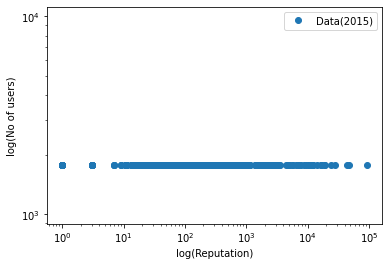

In [87]:
x = np.array(df_users_2015['Reputation'])
y = np.array(len(df_users_2015))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(2015)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

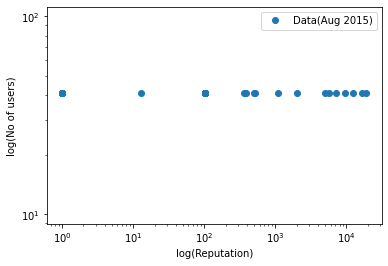

In [86]:
df_users_2015_10 = df_users_2015[df_users_2015['Month']==10]
x = np.array(df_users_2015_10['Reputation'])
y = np.array(len(df_users_2015_10))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(Aug 2015)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

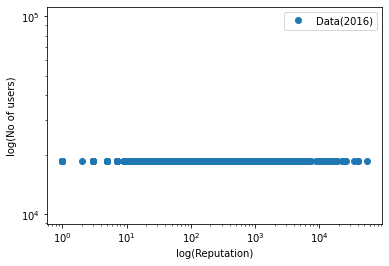

In [88]:
x = np.array(df_users_2016['Reputation'])
y = np.array(len(df_users_2016))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(2016)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

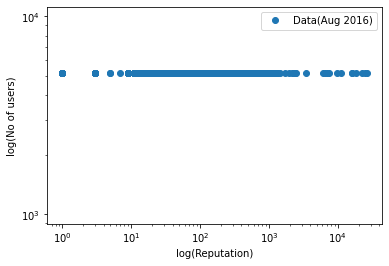

In [89]:
df_users_2016_10 = df_users_2016[df_users_2016['Month']==10]
x = np.array(df_users_2016_10['Reputation'])
y = np.array(len(df_users_2016_10))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(Aug 2016)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

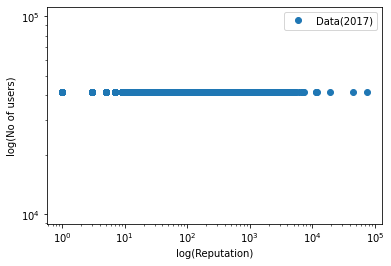

In [90]:
x = np.array(df_users_2017['Reputation'])
y = np.array(len(df_users_2017))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(2017)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

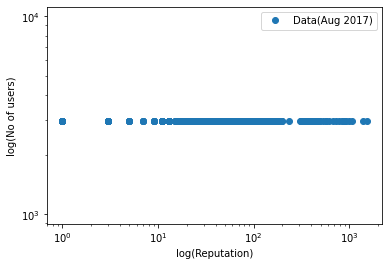

In [92]:
df_users_2017_10 = df_users_2017[df_users_2017['Month']==10]
x = np.array(df_users_2017_10['Reputation'])
y = np.array(len(df_users_2017_10))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(Aug 2017)')

# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

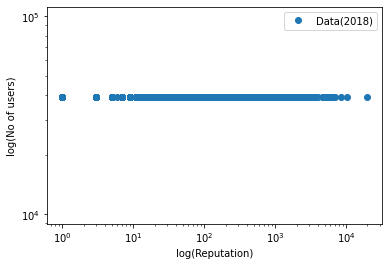

In [93]:
x = np.array(df_users_2018['Reputation'])
y = np.array(len(df_users_2018))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(2018)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

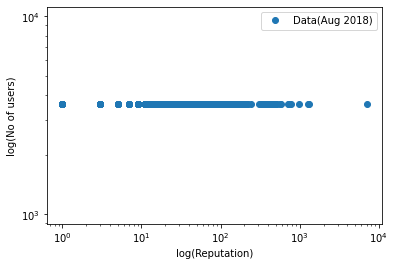

In [95]:
df_users_2018_10 = df_users_2018[df_users_2018['Month']==10]
x = np.array(df_users_2018_10['Reputation'])
y = np.array(len(df_users_2018_10))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(Aug 2018)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

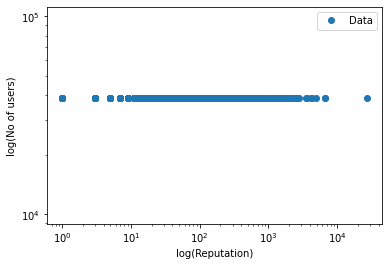

In [73]:
x = np.array(df_users_2019['Reputation'])
y = np.array(len(df_users_2019))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(2019)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

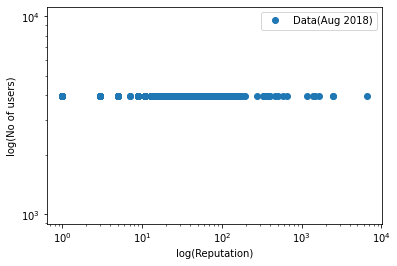

In [96]:
df_users_2019_10 = df_users_2019[df_users_2019['Month']==10]
x = np.array(df_users_2019_10['Reputation'])
y = np.array(len(df_users_2019_10))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(Aug 2019)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

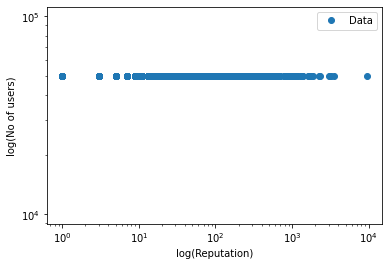

In [74]:
x = np.array(df_users_2020['Reputation'])
y = np.array(len(df_users_2020))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

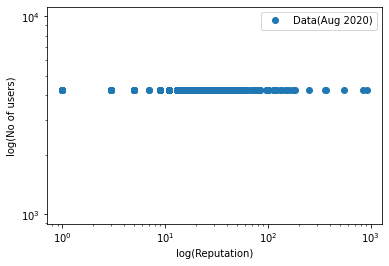

In [97]:
df_users_2020_10 = df_users_2020[df_users_2020['Month']==10]
x = np.array(df_users_2020_10['Reputation'])
y = np.array(len(df_users_2020_10))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(Aug 2020)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

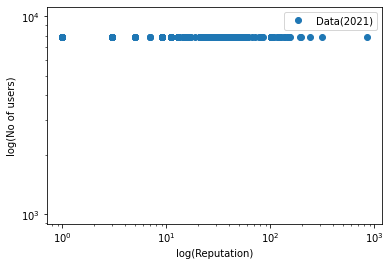

In [98]:
x = np.array(df_users_2021['Reputation'])
y = np.array(len(df_users_2021))


# Create a Pandas DataFrame with the original data and the fitted curve
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data and the fitted curve using Matplotlib
plt.plot(df['x'], df['y'], 'o', label='Data(2021)')
# set x and y labels
plt.xlabel('log(Reputation)')
plt.ylabel('log(No of users)')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()